In [2]:
%load_ext autoreload
%autoreload 2
    
import sys
sys.path.append("..")  # Adjusts the path to include the parent directory

import warnings
warnings.filterwarnings('ignore') # warnings while creating plot, not relevant

from rps_simulation.iterated_model import *  



## 1. Bifurcation Plot - Logistic Learning Curve (Sigmoid)

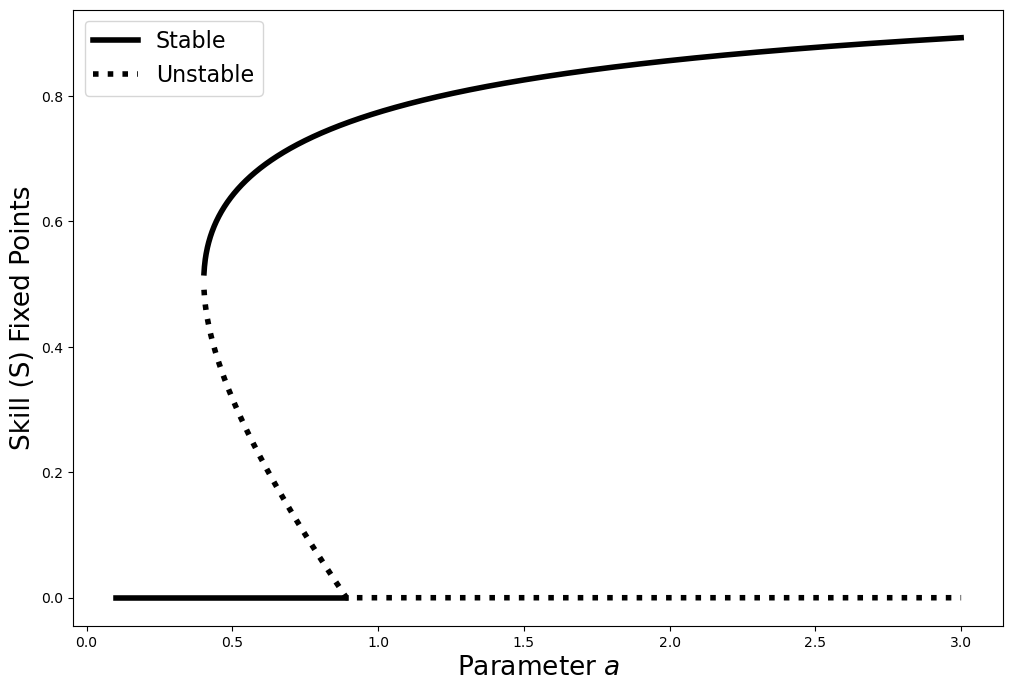

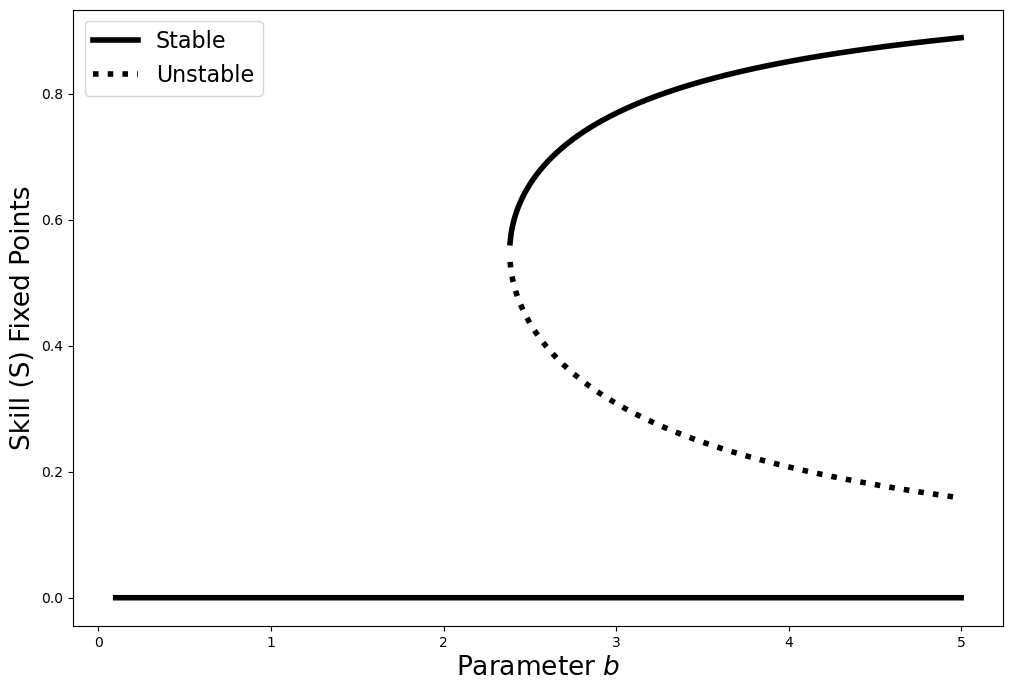

In [ ]:
# Create bifurcation diagrams for both parameters
create_bifurcation_diagram( param_range=(0.1, 3.0), 
                           param_name='a', n_points=2001, save='../plots/itBif_a_sig.jpg')

create_bifurcation_diagram( param_range=(0.1, 5.0), 
                          param_name='b', n_points=2001, save='../plots/itBif_b_sig.jpg')


## 2. Bifurcation Plot - Exponential Learning Curve (Concave)

In [1]:
# Create bifurcation diagrams for both parameters
create_bifurcation_diagram(param_range=(0.1, 3.0),  lc='con',
                            param_name='a', n_points=2001, save='../plots/itBif_a_con.jpg')

create_bifurcation_diagram(param_range=(0.1, 5.0), lc='con',
                          param_name='b', n_points=2001, save='../plots/itBif_b_con.jpg')


NameError: name 'create_bifurcation_diagram' is not defined